# Issue 8 : Hyperparameter Tuning and Model Performance Comparison

## **Description**
1. Train multiple classification models (e.g., Logistic Regression, Random Forest, XGBoost).
2. Apply **SMOTE** to handle class imbalance.
3. Implement **hyperparameter tuning** using:
   - **Grid Search CV**
4. Compare model performance **before and after tuning**.
5. Select the **best model** based on evaluation metrics.

# Importing Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
data = pd.read_csv("encoded-in-vehicle-coupon-recommendation.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12610 non-null  int64
 1   passanger             12610 non-null  int64
 2   weather               12610 non-null  int64
 3   temperature           12610 non-null  int64
 4   time                  12610 non-null  int64
 5   coupon                12610 non-null  int64
 6   expiration            12610 non-null  int64
 7   gender                12610 non-null  int64
 8   age                   12610 non-null  int64
 9   maritalStatus         12610 non-null  int64
 10  has_children          12610 non-null  int64
 11  education             12610 non-null  int64
 12  occupation            12610 non-null  int64
 13  income                12610 non-null  int64
 14  Bar                   12610 non-null  int64
 15  CoffeeHouse           12610 non-null  int64
 16  Carr

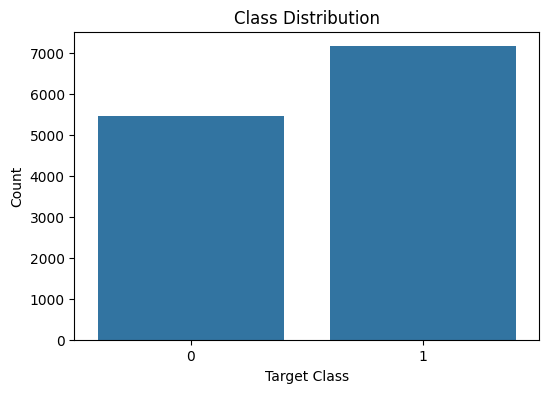

In [6]:
# Checking Target Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=data["Y"])
plt.title("Class Distribution")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

In [7]:
# Dividing Dependent and Independent variables
X = data.drop("Y", axis=1)
y = data["Y"]

In [8]:
# Selecting Top 10 Important Features
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X, y)

In [9]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Applying SMOTE to handle imbalance dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

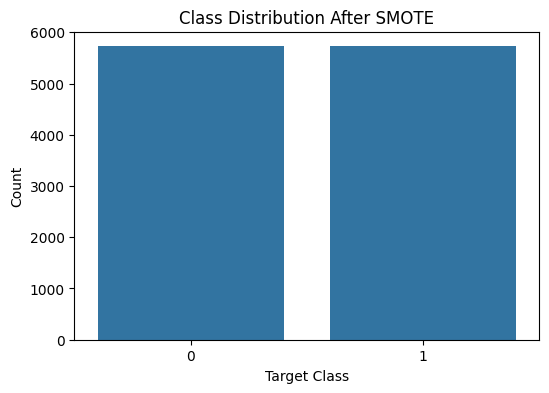

In [11]:
# Check class distribution after SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_smote)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

In [12]:
# Standardize features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

In [13]:
# Model Parameter Dictionary for Grid Search CV
model_params = {
    "RandomForest": {
        'model' : RandomForestClassifier(),
        'params' : {
            "n_estimators": [100, 200, 300],
            "max_depth": [10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },

    "XGBoost": {
        'model' : XGBClassifier(),
        'params' : {
            "n_estimators": [100, 200, 300],
            "learning_rate": [ 0.05, 0.1,],
            "max_depth": [5, 10],
            "subsample": [0.5, 1.0],
            "gamma": [0.1, 0.2,],
            "lambda": [0, 1]
        }

    }
}

In [14]:
# Computing best model score and parameter using grid search cv
scores=[]

for model_name , mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=3,return_train_score=False)
    clf.fit(X_train_smote, y_train_smote)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [16]:
best_model = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_model

,model,best_score,best_params
0,RandomForest,0.714199,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_..."
1,XGBoost,0.715858,"{'gamma': 0.2, 'lambda': 1, 'learning_rate': 0..."


              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1091
           1       0.72      0.70      0.71      1431

    accuracy                           0.67      2522
   macro avg       0.67      0.67      0.67      2522
weighted avg       0.67      0.67      0.67      2522



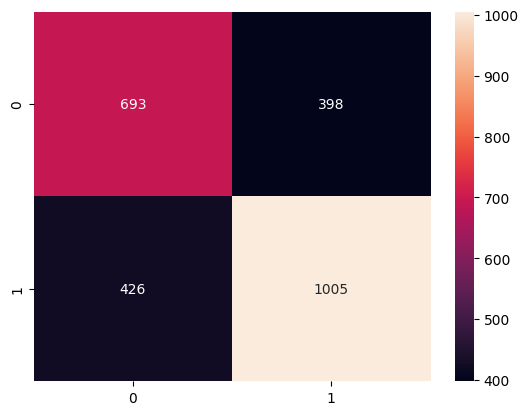

In [22]:
# Training Random Forest without Hyperparameter Tuning
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1091
           1       0.74      0.72      0.73      1431

    accuracy                           0.70      2522
   macro avg       0.69      0.69      0.69      2522
weighted avg       0.70      0.70      0.70      2522



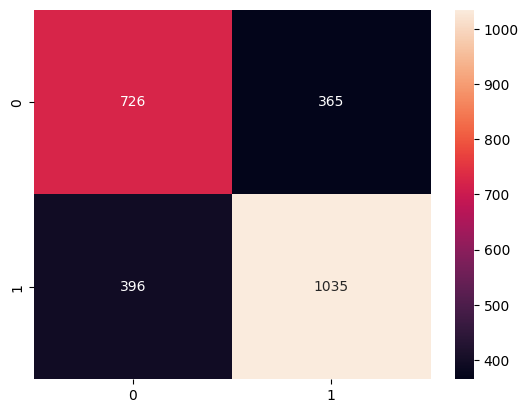

In [23]:
# Training XGBoost without Hyperparamter Tuning
xgb = XGBClassifier()
xgb.fit(X_train_smote, y_train_smote)
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      1091
           1       0.73      0.74      0.74      1431

    accuracy                           0.70      2522
   macro avg       0.69      0.69      0.69      2522
weighted avg       0.70      0.70      0.70      2522



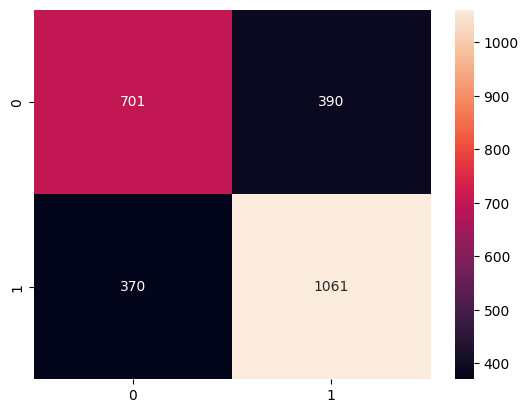

In [25]:
# Training Random Forest with Tuned Hyper parameters
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300)
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.64      0.67      0.66      1091
           1       0.74      0.71      0.73      1431

    accuracy                           0.70      2522
   macro avg       0.69      0.69      0.69      2522
weighted avg       0.70      0.70      0.70      2522



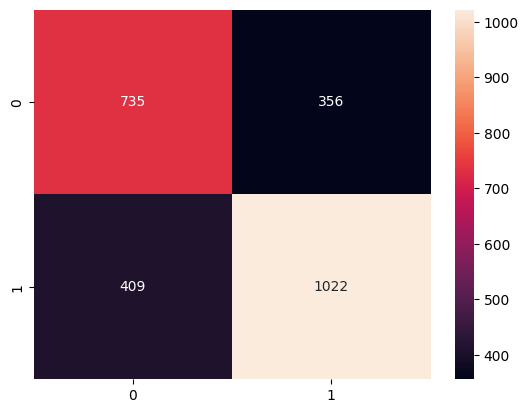

In [26]:
# Training XGBoost Classifier with Tuned HyperParamters
xgb = XGBClassifier(
    gamma=0.2,
    reg_lambda=1,
    learning_rate=0.05,
    max_depth=10,
    n_estimators=100,
    subsample=1.0
)
xgb.fit(X_train_smote, y_train_smote)
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.show()

# Analysis

1. Random Forest showed significant imporvement after hyper parameter tuning.
2. XGBoost classifier overall stayed the same before and after the hyper paramter tuning.
3. Use Random Forest if XGBoost is computationally expensive as both shows overall same performance after HyperParamter Tuning.